In [51]:
!pip install pypyodbc
import pypyodbc as podbc
conn = podbc.connect(
        r'Driver={SQL Server};' 
        r'Server=TANISHK\SQLEXPRESS01;' 
        r'Database=banking_case;'  
        r'Trusted_connection=yes;'
)


   

In [52]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
if conn:
    print('True')

True


In [53]:
query = "select * from dbo.banking"

In [54]:
df = pd.read_sql(query,conn)
df.head()

C:\Users\jhata\AppData\Local\Temp\ipykernel_12176\2610741577.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,genderid,iaid
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1.485829e+06,6.036179e+05,607332.437500,12249.959961,1.134475e+06,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,6.414828e+05,2.295214e+05,344635.156250,61162.308594,2.000526e+06,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1.033402e+06,6.526747e+05,203054.343750,79071.781250,5.481376e+05,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1.048158e+06,1.048158e+06,234685.015625,57513.648438,1.148402e+06,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,4.877825e+05,4.466442e+05,128351.453125,30012.140625,1.674412e+06,0,3,1,2,5


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_id                 3000 non-null   object 
 1   name                      3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   location_id               3000 non-null   int64  
 4   joined_bank               3000 non-null   object 
 5   banking_contact           3000 non-null   object 
 6   nationality               3000 non-null   object 
 7   occupation                3000 non-null   object 
 8   fee_structure             3000 non-null   object 
 9   loyalty_classification    3000 non-null   object 
 10  estimated_income          3000 non-null   float64
 11  superannuation_savings    3000 non-null   float64
 12  amount_of_credit_cards    3000 non-null   int64  
 13  credit_card_balance       3000 non-null   float64
 14  bank_loa

In [56]:
##Generating descriptive statsicts for the dataframe
df.describe()

,age,location_id,estimated_income,superannuation_savings,amount_of_credit_cards,credit_card_balance,bank_loans,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,genderid,iaid
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034184,25531.599685,1.463667,3176.206944,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529998,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808180,16259.950768,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924033,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480469,1482.030029,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.597656,12513.774902,1.000000,1236.630005,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542236,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.476562,22357.355469,1.000000,2560.804932,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190430,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.300781,35464.741211,2.000000,4522.632690,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.391602,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.250000,75963.898438,3.000000,13991.990234,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.867188,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [57]:
df.shape

(3000, 25)

<Axes: xlabel='Income band'>

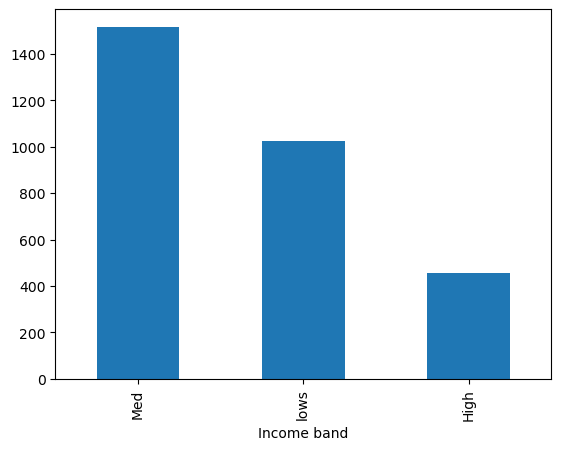

In [58]:
bins = [0,100000,300000,float('inf')]
labels =  ['lows','Med','High']
df['Income band'] = pd.cut(df['estimated_income'],bins=bins,labels=labels,right =False)
df['Income band'].value_counts().plot(kind='bar')

In [59]:
df.columns


Index(['client_id', 'name', 'age', 'location_id', 'joined_bank',
       'banking_contact', 'nationality', 'occupation', 'fee_structure',
       'loyalty_classification', 'estimated_income', 'superannuation_savings',
       'amount_of_credit_cards', 'credit_card_balance', 'bank_loans',
       'bank_deposits', 'checking_accounts', 'saving_accounts',
       'foreign_currency_account', 'business_lending', 'properties_owned',
       'risk_weighting', 'brid', 'genderid', 'iaid', 'Income band'],
      dtype='object')

In [60]:
#Examine the distributaion of unique cataegories in categorical columns 
 
categorical_cols = df[['brid','genderid','iaid',"amount_of_credit_cards","nationality","occupation","fee_structure",'loyalty_classification','properties_owned','risk_weighting','Income band']].columns 

for col in categorical_cols:
    print(f"Value counts for '{col}':")
    display(df[col].value_counts())

Value counts for 'brid':


brid
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value counts for 'genderid':


genderid
2    1512
1    1488
Name: count, dtype: int64

Value counts for 'iaid':


iaid
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value counts for 'amount_of_credit_cards':


amount_of_credit_cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value counts for 'nationality':


nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value counts for 'occupation':


occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value counts for 'fee_structure':


fee_structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value counts for 'loyalty_classification':


loyalty_classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value counts for 'properties_owned':


properties_owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value counts for 'risk_weighting':


risk_weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value counts for 'Income band':


Income band
Med     1517
lows    1027
High     456
Name: count, dtype: int64

## UNIVARIATE ANALYSIS

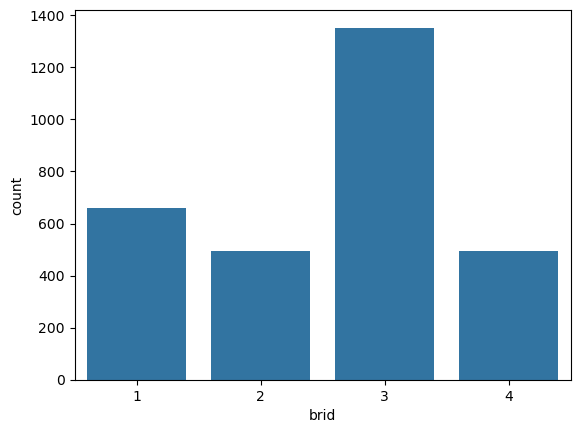

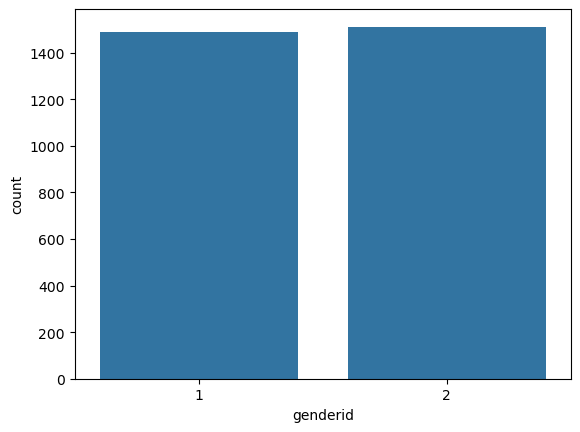

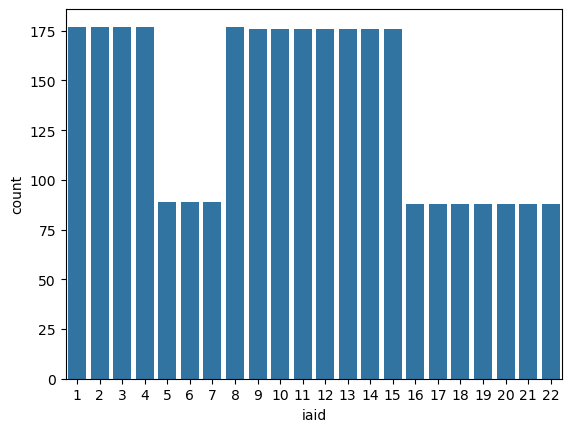

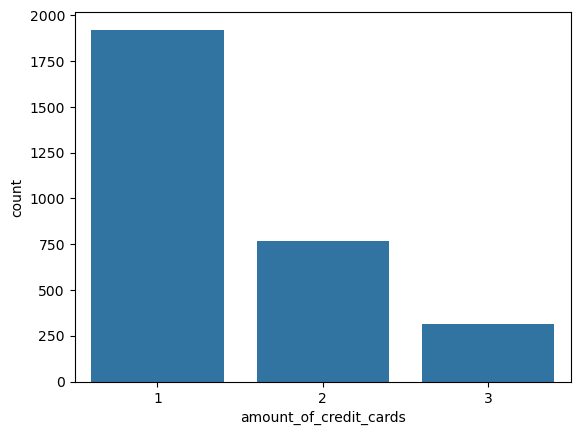

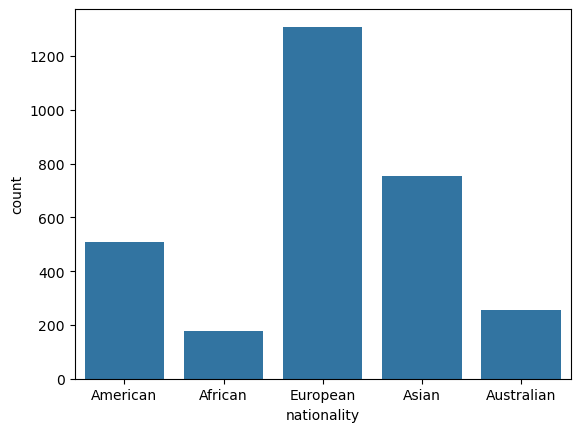

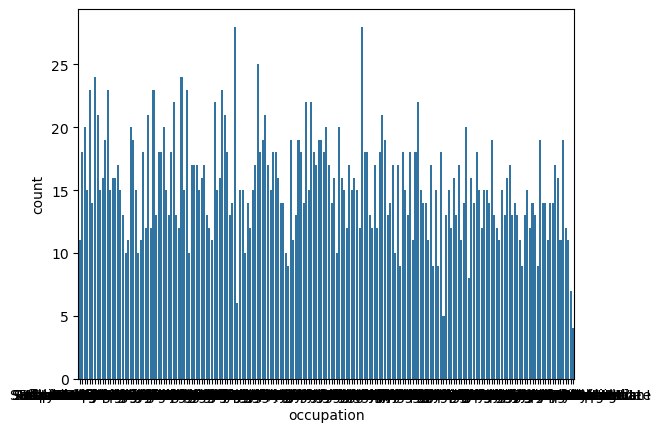

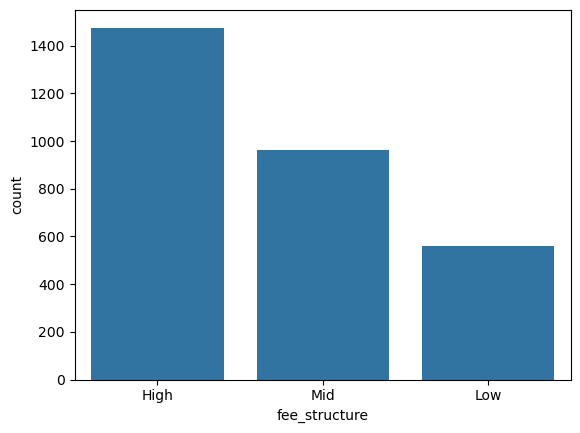

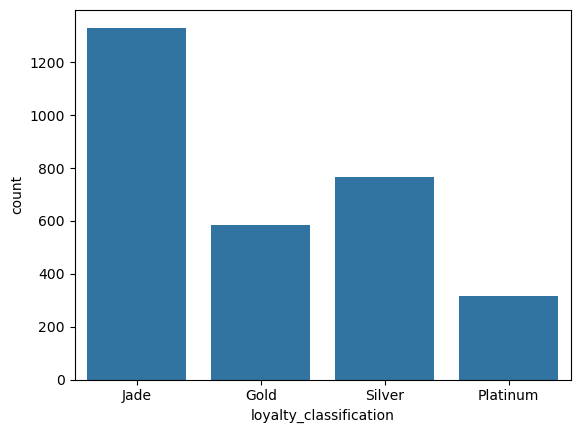

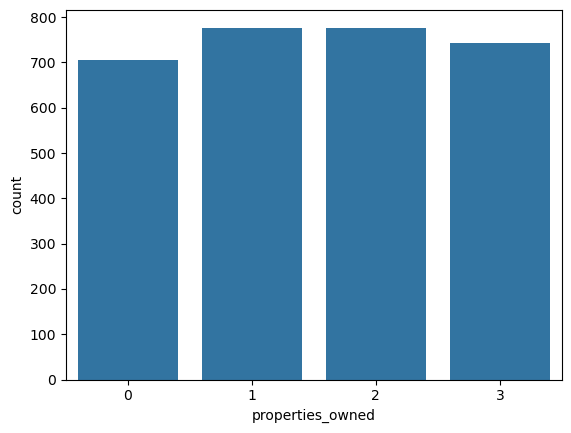

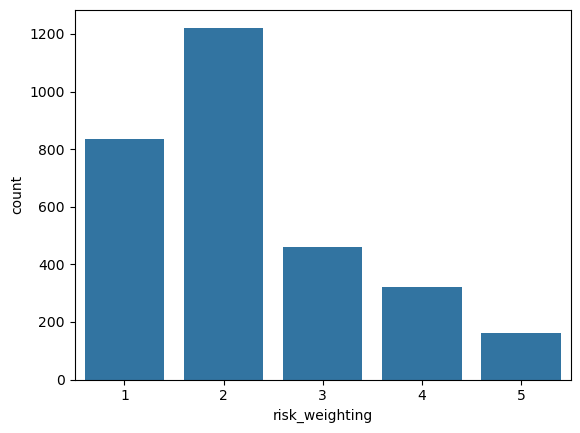

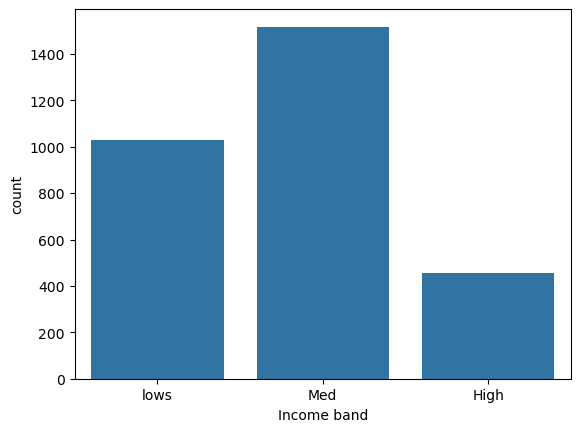

In [61]:
for i, predictor in enumerate(df[['brid','genderid','iaid',"amount_of_credit_cards","nationality","occupation","fee_structure",'loyalty_classification','properties_owned','risk_weighting','Income band']]):
    plt.figure(i)
    sns.countplot(data =df, x=predictor) 

## BIVARIATE ANALYSIS

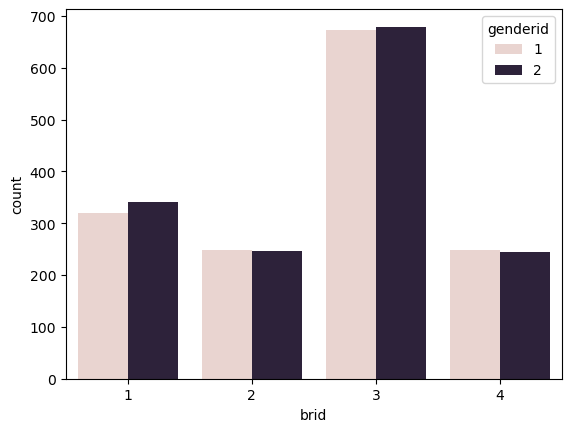

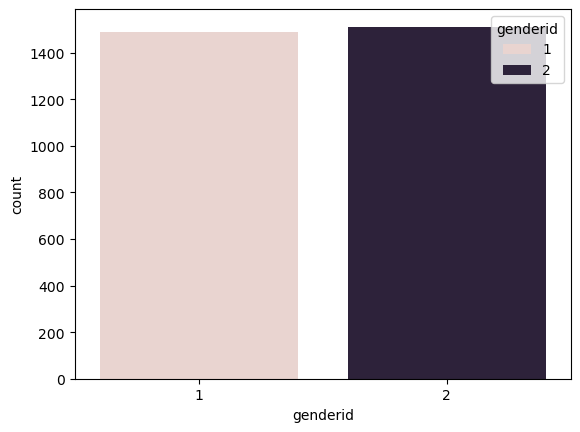

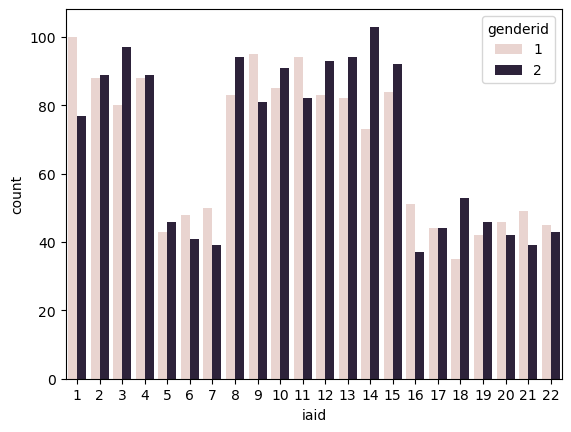

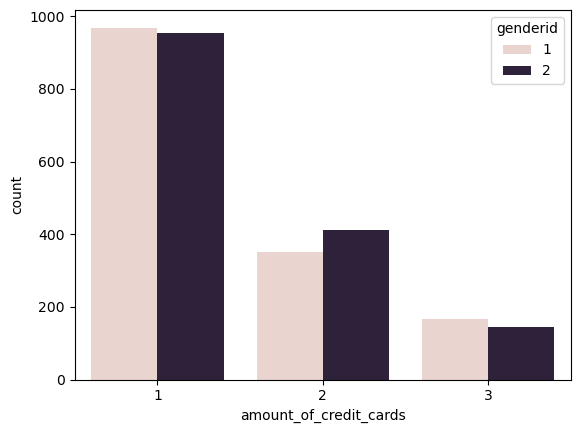

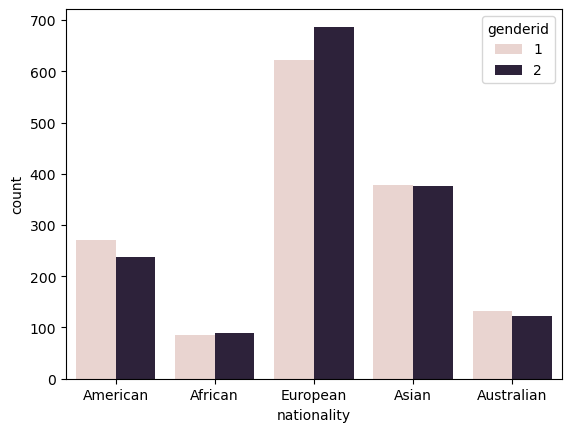

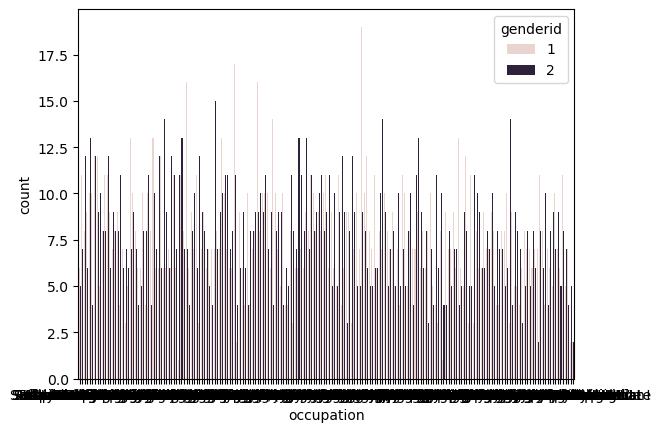

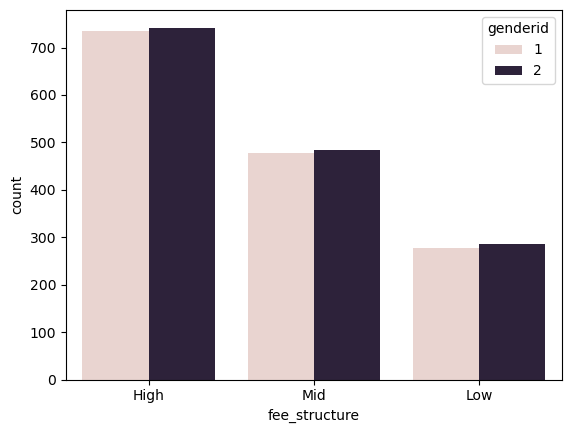

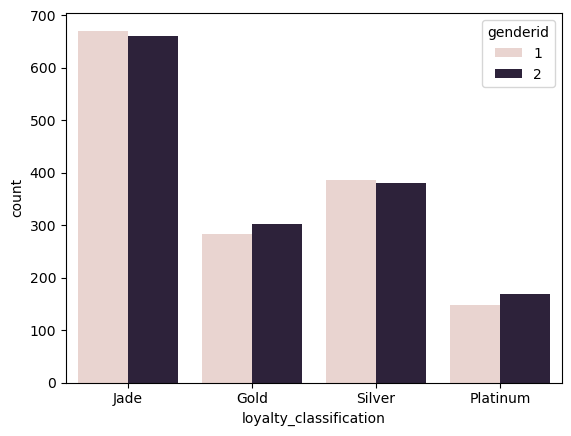

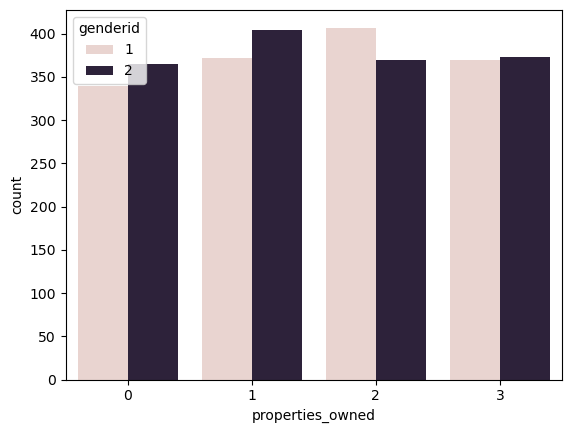

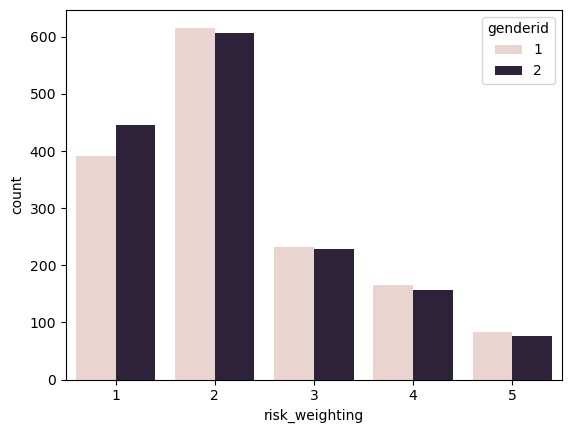

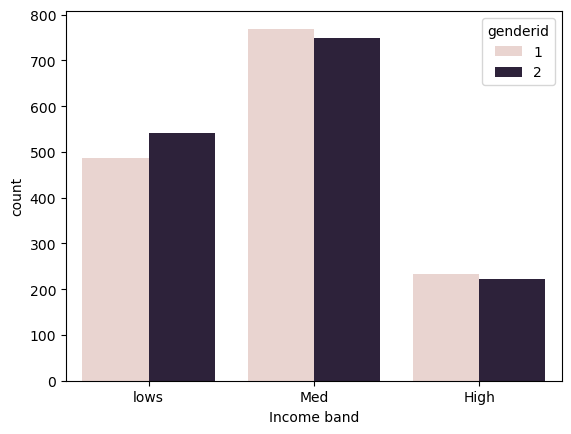

In [62]:
for i, predictor in enumerate(df[['brid','genderid','iaid',"amount_of_credit_cards","nationality","occupation","fee_structure",'loyalty_classification','properties_owned','risk_weighting','Income band']]):
    plt.figure(i)
    sns.countplot(data =df, x=predictor, hue='genderid') 

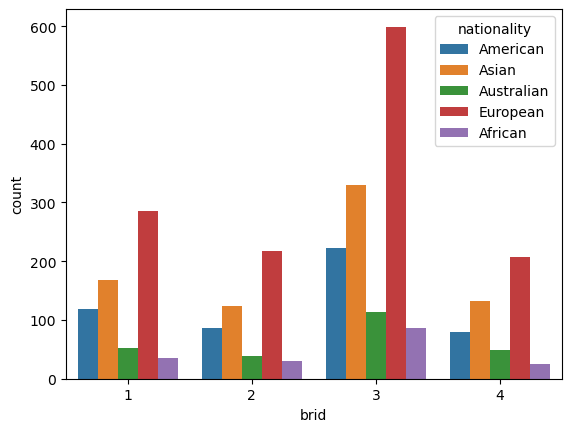

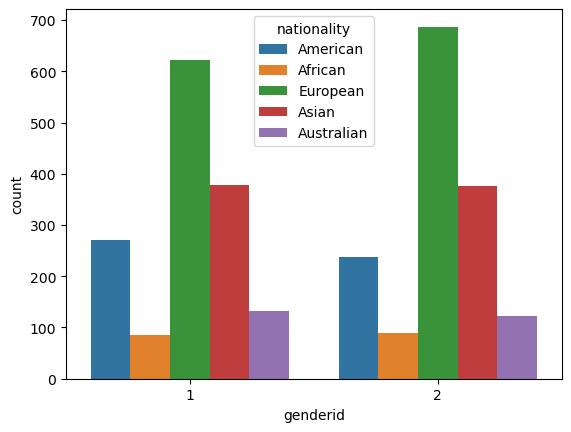

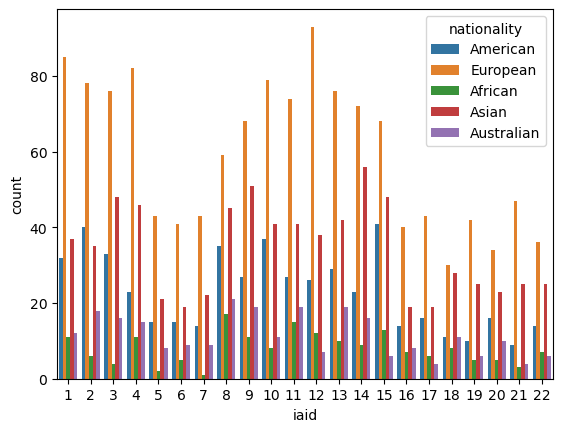

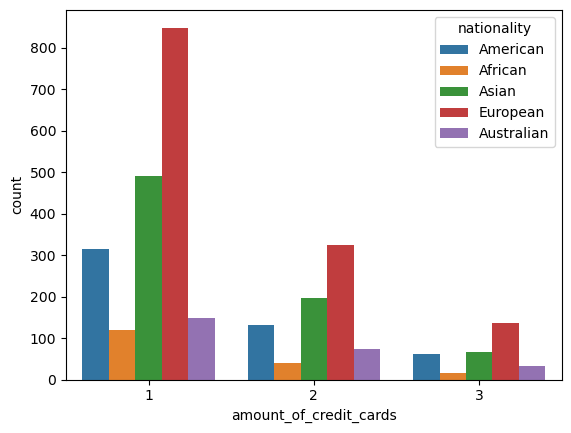

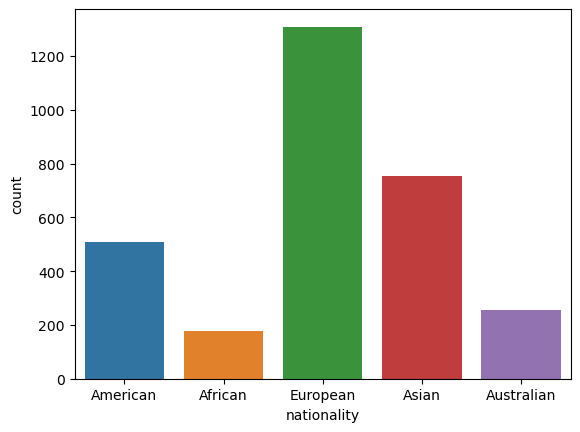

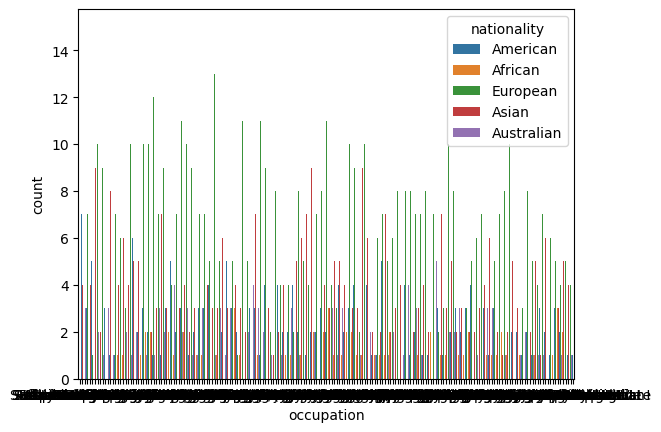

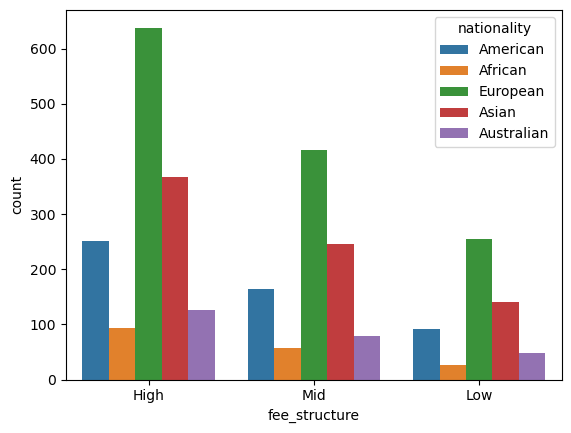

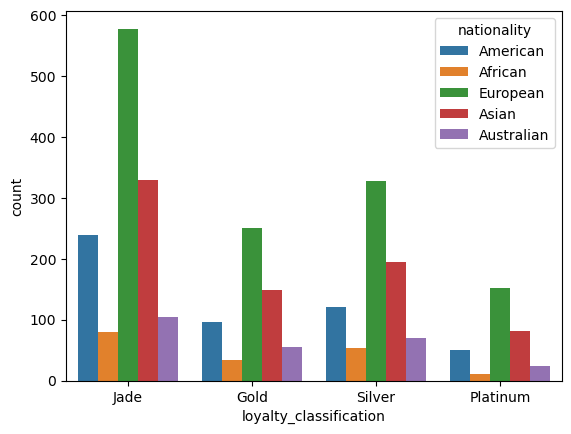

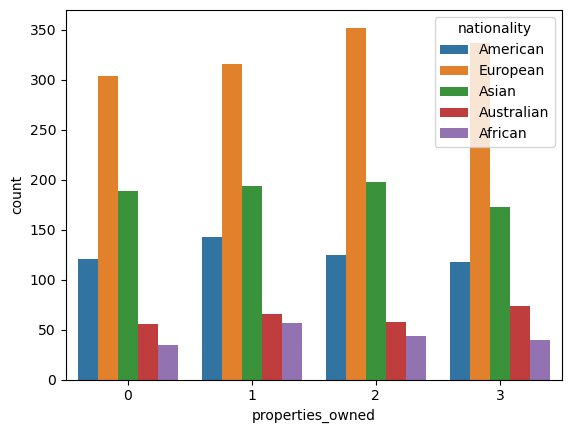

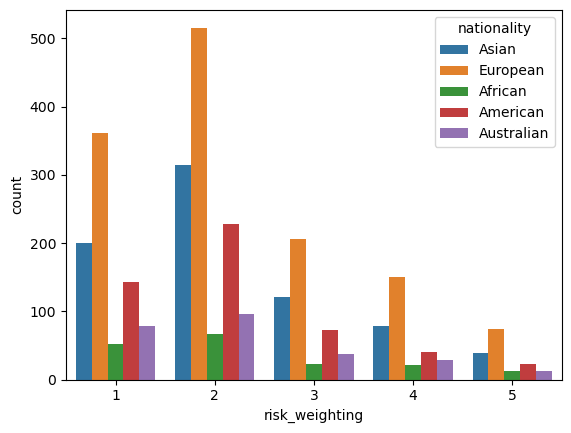

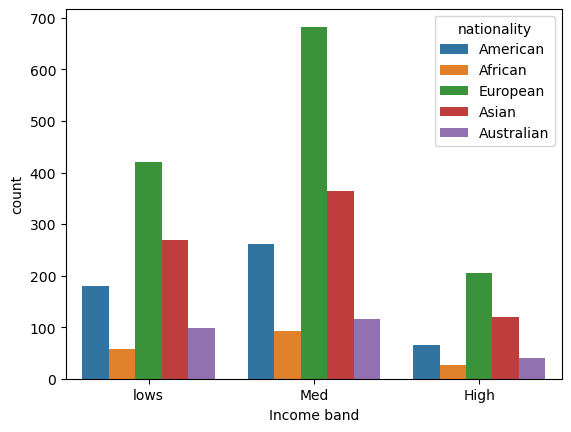

In [63]:
for i, predictor in enumerate(df[['brid','genderid','iaid',"amount_of_credit_cards","nationality","occupation","fee_structure",'loyalty_classification','properties_owned','risk_weighting','Income band']]):
    plt.figure(i)
    sns.countplot(data =df, x=predictor, hue='nationality') 

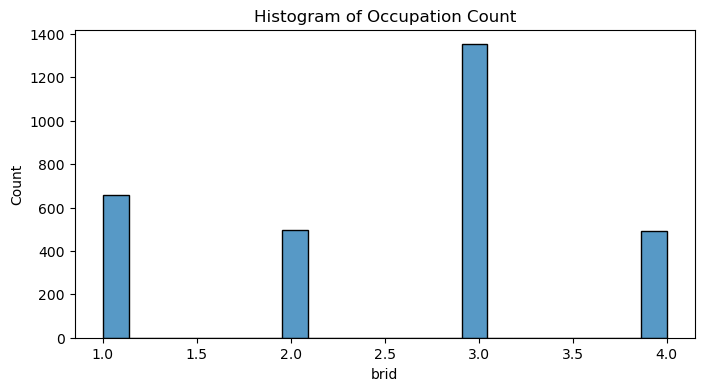

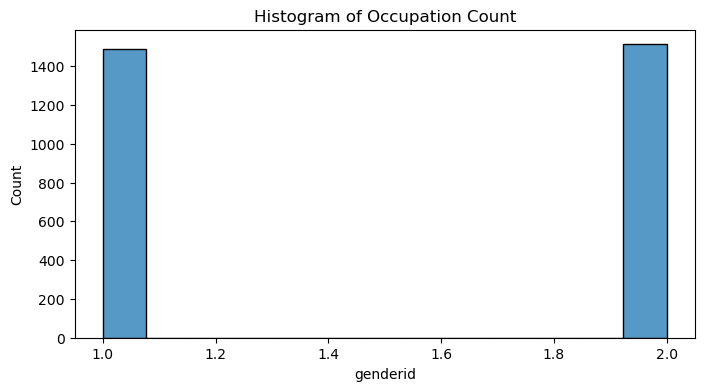

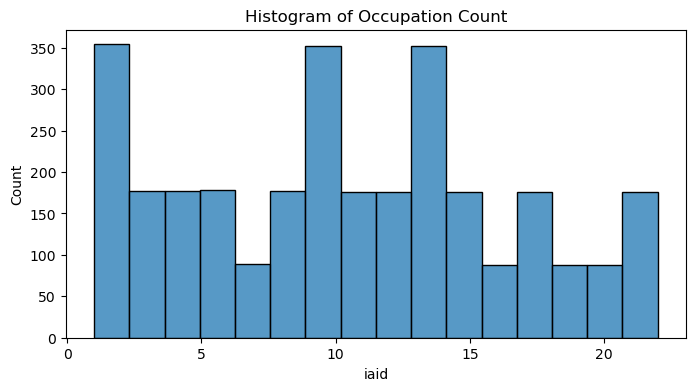

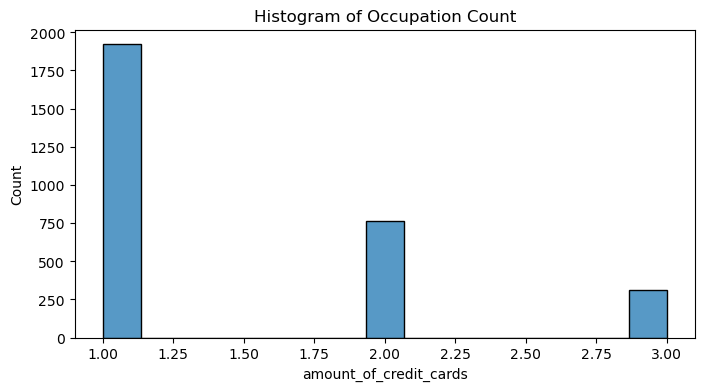

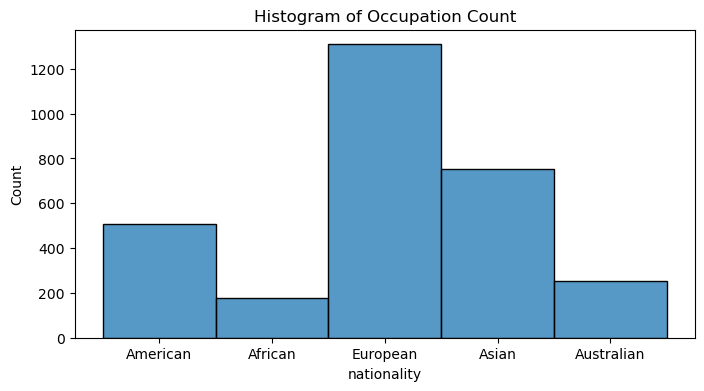

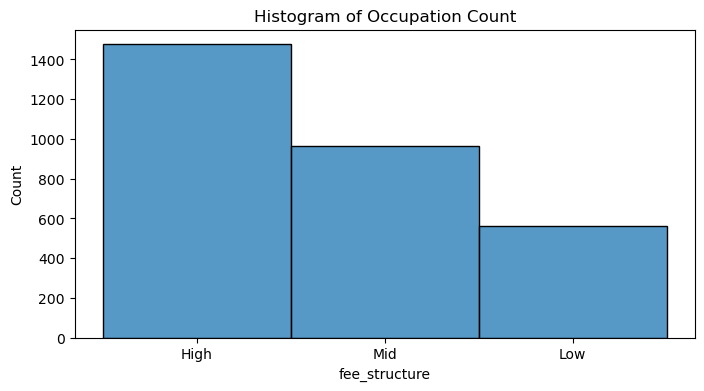

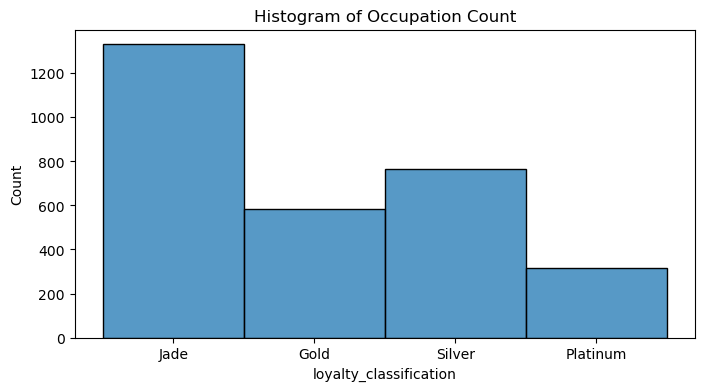

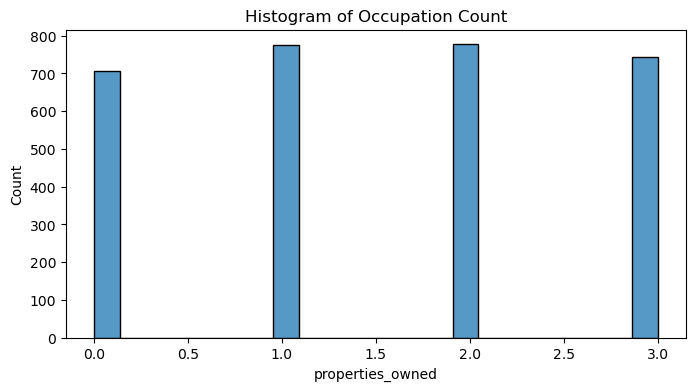

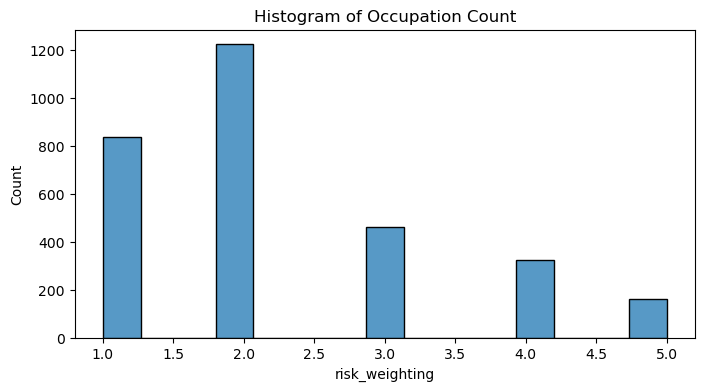

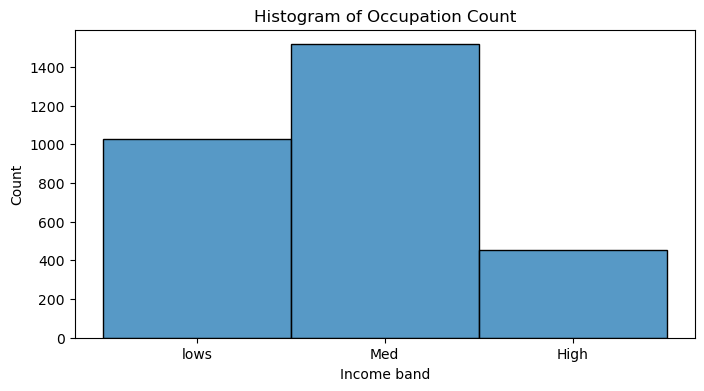

In [64]:
#histplot of value count for different occupation 
for col in categorical_cols:
    if col == "occupation":
        continue
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title("Histogram of Occupation Count")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    

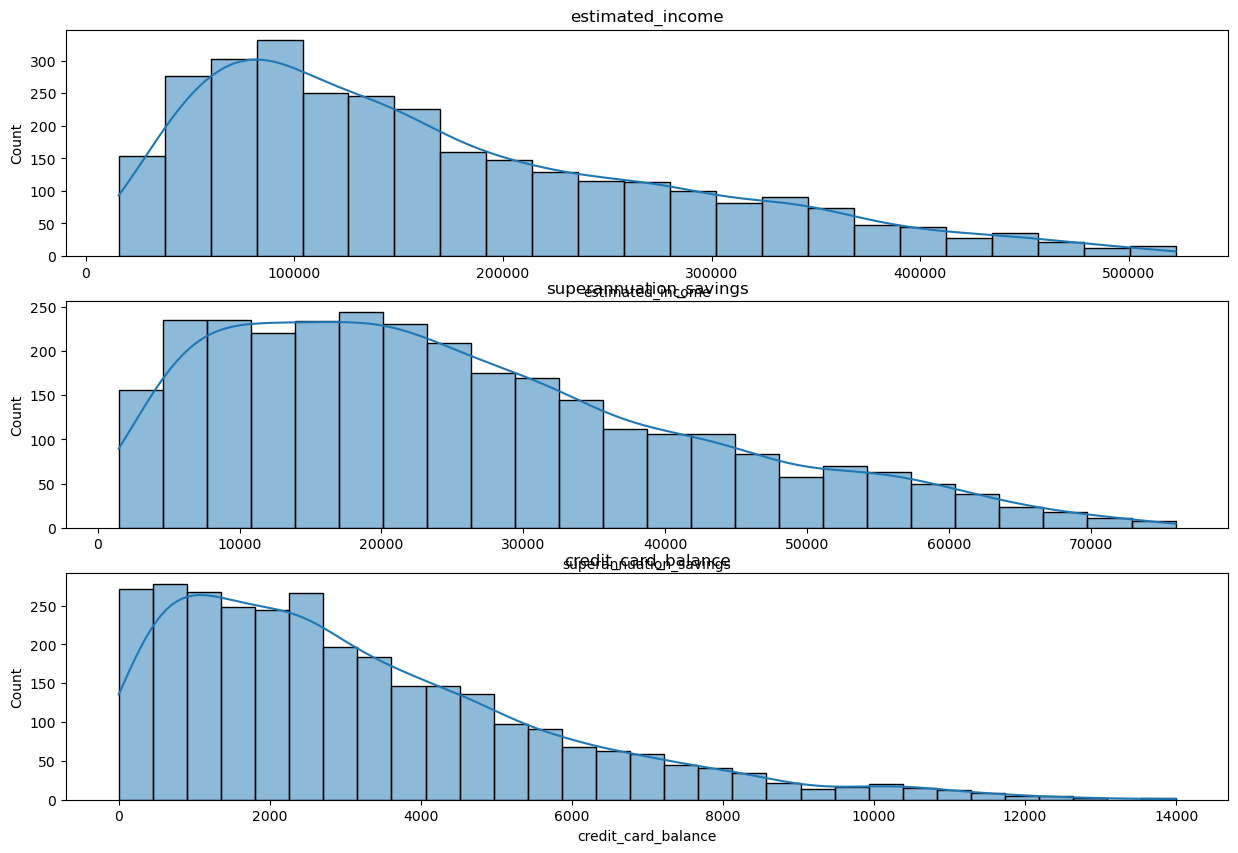

In [65]:
## Numerical Analysis 

numerical_cols = ['estimated_income', 'superannuation_savings' , "credit_card_balance"]

#Uniivartae analysis and visualization 
plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(3,1,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.show()


# HEATMAP

In [66]:
df.columns

Index(['client_id', 'name', 'age', 'location_id', 'joined_bank',
       'banking_contact', 'nationality', 'occupation', 'fee_structure',
       'loyalty_classification', 'estimated_income', 'superannuation_savings',
       'amount_of_credit_cards', 'credit_card_balance', 'bank_loans',
       'bank_deposits', 'checking_accounts', 'saving_accounts',
       'foreign_currency_account', 'business_lending', 'properties_owned',
       'risk_weighting', 'brid', 'genderid', 'iaid', 'Income band'],
      dtype='object')

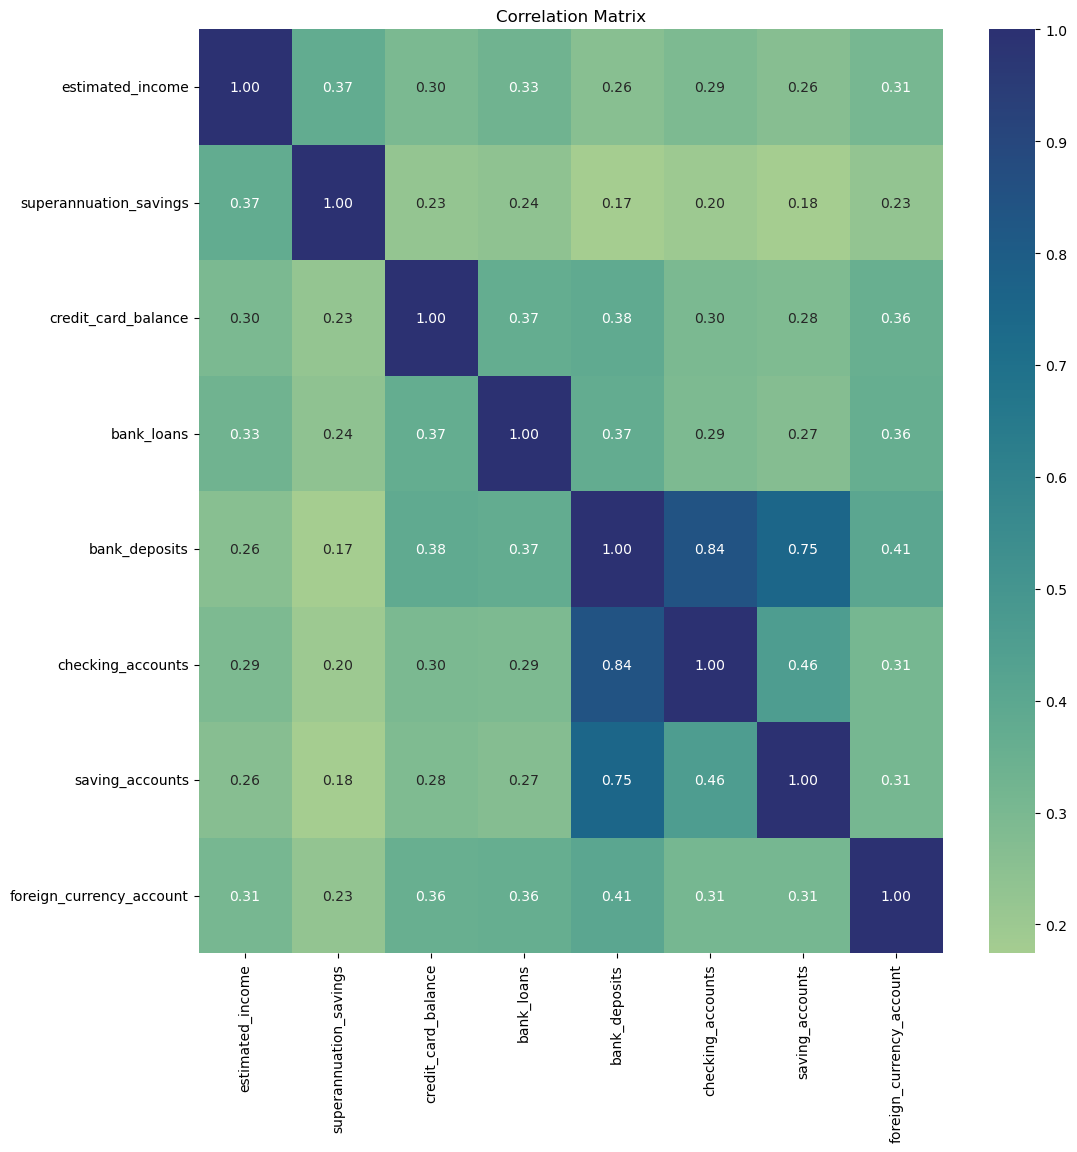

In [67]:
numerical_cols = ['estimated_income', 'superannuation_savings' , "credit_card_balance","bank_loans",'bank_deposits','checking_accounts','saving_accounts','foreign_currency_account']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix,annot=True,cmap='crest',fmt=".2f")
plt.title("Correlation Matrix")
plt.show()